## Dados e bibliotecas

In [144]:
# Importando as bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt

# Importando biblioteca para plotagem 3D:
from matplotlib import cm

# Importando bibliotecas Scikit Learn; 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Usando a função mágica para plotagem:
%matplotlib inline

In [145]:
# Definindo o conjunto de amostras:
M = 1000

# Definindo a função de ENTRADAS (features):
x1 = (np.random.uniform(-5, 5, M)).reshape(M, 1)
x2 = (np.random.uniform(-0.5, 0.5, M)).reshape(M, 1)

# Definindo a função de RUÍDO:
w = np.random.randn(M, 1)

# Definindo a função de SAÍDA: (target)
y = x1 + x2

# Definindo a função de OBSERVÁVEL (targets):
y_noisy = y + w

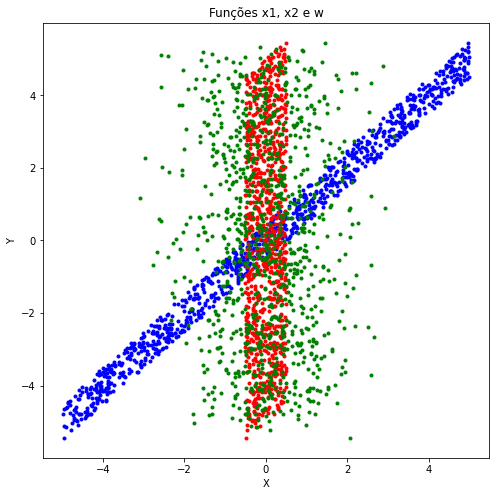

In [146]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x1, y, 'b.')
plt.plot(x2, y, 'r.')
plt.plot(w , y, 'g.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Funções x1, x2 e w')
plt.show()

## Plotando o gráfico em 3D

In [147]:
# Criando a SUPERFÍCIE DE ERRO:

# Defininindo o número de iterações:
N = 400

# Definindo valores LINEARMENTE espaçados para os PESOS:
a1 = np.linspace(-10.0, 10.0, N)
a2 = np.linspace(-10.0, 10.0, N)

# Criando a malha da superfície de ERRO:
A1, A2 = np.meshgrid(a1, a2)

# Criando a matriz para armazenamento dos erros:
J = np.zeros((N,N))

# lOOP:
for iter1 in range(0, N):
    for iter2 in range(0, N):
        
        y_hat = A1[iter1][iter2] * x1 + A2[iter1][iter2] * x2
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y_noisy - y_hat))

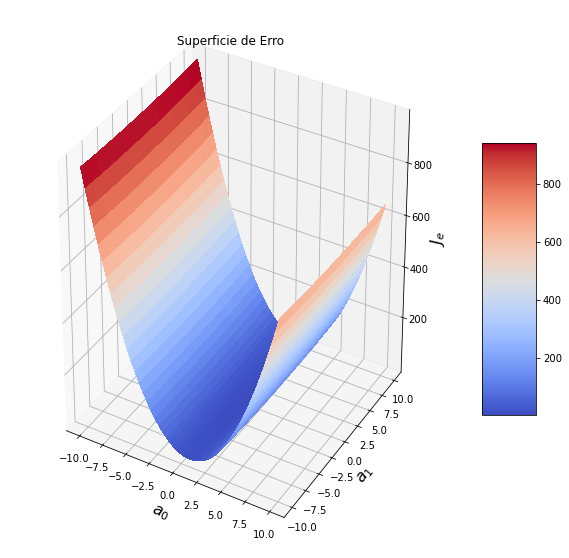

In [148]:
# Plotando o gráfico da SUPERFÍCIE DE ERRO:

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, 
                       antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=16)
ax.set_ylabel('$a_1$', fontsize=16)
ax.set_zlabel('$J_e$', fontsize=16);
plt.title('Superficie de Erro')
plt.show()

## Formula fechada

In [149]:
# Concatena ambos os valores para features x1 e x2
X = np.c_[x1, x2]

# Aplica a formula fechada:
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))
y_hat = X.dot(a_opt)
j_opt = (1/M)*np.sum(np.power((y - y_hat), 2))

In [150]:
# Imprimindo os PESOS ÓTIMOS encontrados pela FORMULA FECHADA:
print('O valor de a1 ótimo encontrado é: {}'.format(a_opt[0, 0]))
print('O valor de a2 ótimo encontrado é: {}'.format(a_opt[1, 0]))

O valor de a1 ótimo encontrado é: 0.9822602601074977
O valor de a2 ótimo encontrado é: 0.9941680904873356


## Gradiente descendente BATELADA

In [151]:
################################# PADRÃO ######################################

# Definindo o PASSO DE APRENDIZAGEM: 
alpha = 0.08

# Criando o vetor para ARMAZENAMENTO dos PESOS ÓTIMOS:
a = np.zeros((2, 1))

# Definindo os valores INICIAIS dos pesos:
a[0, 0] = -10
a[1, 0] = -10

# Criando a matriz de pesos HISTÓRICOS:
a_hist = np.zeros((2, M+1))

# Criando a matriz de ERRO:
jgd = np.zeros(M+1)

# Definindo o valor do ERRO INICIAL:
jgd[0] = (1.0/M) * sum(np.power(y_noisy - X.dot(a), 2))

###############################################################################

In [152]:
# Defindo o inicio da iteração
iteration = 0

# Criando uma matriz de GRADIENTES HISTÓRICOS:
grad_hist = np.zeros((2, M))

In [153]:
# LOOP do GRADIENTE:
while iteration < M:
    
    gradients = -(2.0/M) * X.T.dot(y_noisy - y_hat)
    
    grad_hist[0, iteration] = gradients[0, 0]
    grad_hist[1, iteration] = gradients[1, 0]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration + 1] = a[0, 0]
    a_hist[1, iteration + 1] = a[1, 0]
    
    y_hat = a[0, 0] * x1 + a[1, 0] * x2
    
    jgd[iteration + 1] = (1.0/M) * sum(np.power((y_noisy - y_hat), 2))
    
    iteration = iteration + 1

In [154]:
# Imprimindo os PESOS ÓTIMOS encontrados pelo GRADIENTE:
print('O valor de a1 ótimo encontrado pelo gradiente é: {}'.format(a[0, 0]))
print('O valor de a2 ótimo encontrado pelo gradiente é: {}'.format(a[1, 0]))

O valor de a1 ótimo encontrado pelo gradiente é: 0.9822602313295407
O valor de a2 ótimo encontrado pelo gradiente é: 0.9941600290863912


## Superfície de contorno

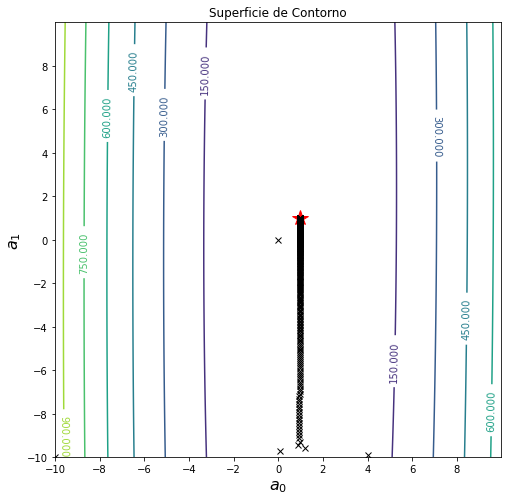

In [155]:
# Plotando a superfície de contorno dos PESOS vs ERRO

fig = plt.figure(figsize=(8, 8))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=16)
plt.ylabel('$a_1$', fontsize=16)
plt.title('Superficie de Contorno')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=16)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-10, 10, step=2.0))
plt.yticks(np.arange(-10, 10, step=2.0))
plt.show()

## Gráfico de ERRO vs Nº de iterações

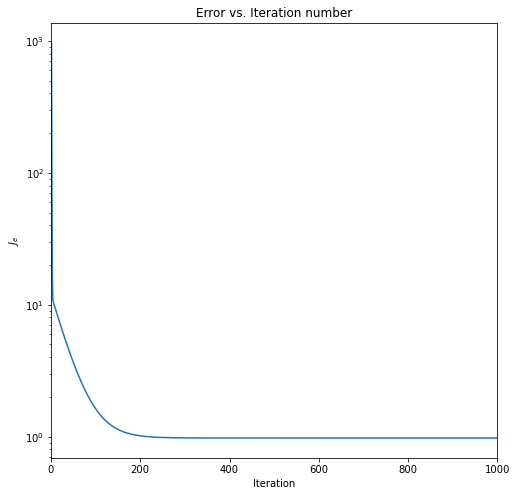

In [156]:
# Plotando o GRÁFICO do ERRO vs NÚMERO DE ITERAÇÕES:
fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(0, iteration), jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()

## Escalonamento Mín - Max

In [169]:
# Concatena os valores das FEATURES
X = np.c_[x1, x2]

# Instancia o escalonador:
scaler = MinMaxScaler()

# Faz o treinamento das FEATURES:
scaler.fit(X)

# Faz o escalonamento das FEATURES:
X = scaler.transform(X)

# Padroniza os valores escalonados:
x1 = X[:, 0].reshape(M, 1)
x2 = X[:, 1].reshape(M, 1)

## Plotagem 3D das features ESCALONADAS

In [158]:
# Criando a SUPERFÍCIE DE ERRO:

# Defininindo o número de iterações:
N = 400

# Definindo valores LINEARMENTE espaçados para os PESOS:
a1 = np.linspace(-10.0, 10.0, N)
a2 = np.linspace(-10.0, 10.0, N)

# Criando a malha da superfície de ERRO:
A1, A2 = np.meshgrid(a1, a2)

# Criando a matriz para armazenamento dos erros:
J = np.zeros((N,N))

# lOOP:
for iter1 in range(0, N):
    for iter2 in range(0, N):
        
        y_hat = A1[iter1][iter2] * x1 + A2[iter1][iter2] * x2
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y_noisy - y_hat))

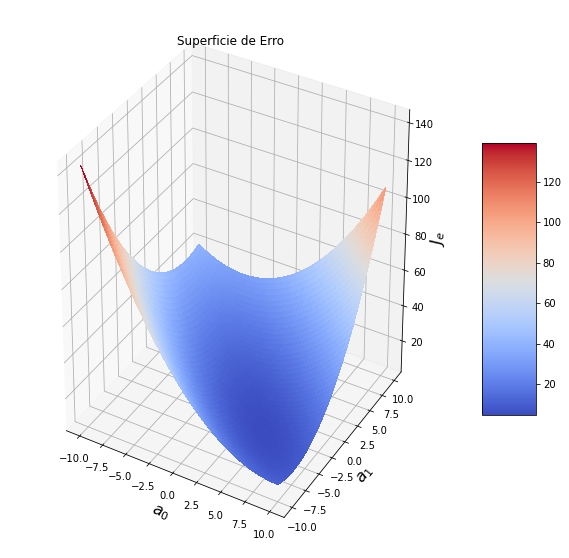

In [159]:
# Plotando o gráfico da SUPERFÍCIE DE ERRO:

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, 
                       antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=16)
ax.set_ylabel('$a_1$', fontsize=16)
ax.set_zlabel('$J_e$', fontsize=16);
plt.title('Superficie de Erro')
plt.show()

## Formula fechada

In [160]:
# Concatena as FEATURES:
X = np.c_[x1, x2]

# Aplica a formula fechada:
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))
y_hat = X.dot(a_opt)
j_opt = (1/M)*np.sum(np.power((y_noisy - y_hat), 2) )

In [161]:
# Imprimindo os PESOS ÓTIMOS encontrados pela FORMULA FECHADA:
print('O valor de a1 ótimo encontrado é: {}'.format(a_opt[0, 0]))
print('O valor de a2 ótimo encontrado é: {}'.format(a_opt[1, 0]))

O valor de a1 ótimo encontrado é: 4.974706023316504
O valor de a2 ótimo encontrado é: -3.384596858254111


In [162]:
################################# PADRÃO ######################################

# Definindo o PASSO DE APRENDIZAGEM: 
alpha = 0.08

# Criando o vetor para ARMAZENAMENTO dos PESOS ÓTIMOS:
a = np.zeros((2, 1))

# Definindo os valores INICIAIS dos pesos:
a[0, 0] = -10
a[1, 0] = -10

# Criando a matriz de pesos HISTÓRICOS:
a_hist = np.zeros((2, M+1))

# Criando a matriz de ERRO:
jgd = np.zeros(M+1)

# Definindo o valor do ERRO INICIAL:
jgd[0] = (1.0/M) * sum(np.power(y_noisy - X.dot(a), 2))

###############################################################################

In [163]:
# Defindo o inicio da iteração
iteration = 0

# Criando uma matriz de GRADIENTES HISTÓRICOS:
grad_hist = np.zeros((2, M))

In [164]:
# LOOP do GRADIENTE:
while iteration < M:
    
    gradients = -(2.0/M) * X.T.dot(y_noisy - y_hat)
    
    grad_hist[0, iteration] = gradients[0, 0]
    grad_hist[1, iteration] = gradients[1, 0]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration + 1] = a[0, 0]
    a_hist[1, iteration + 1] = a[1, 0]
    
    y_hat = a[0, 0] * x1 + a[1, 0] * x2
    
    jgd[iteration + 1] = (1.0/M) * sum(np.power((y_noisy - y_hat), 2))
    
    iteration = iteration + 1

In [165]:
# Imprimindo os PESOS ÓTIMOS encontrados pelo GRADIENTE:
print('O valor de a1 ótimo encontrado pelo gradiente é: {}'.format(a[0, 0]))
print('O valor de a2 ótimo encontrado pelo gradiente é: {}'.format(a[1, 0]))

O valor de a1 ótimo encontrado pelo gradiente é: 4.974702570451877
O valor de a2 ótimo encontrado pelo gradiente é: -3.3845934311049275


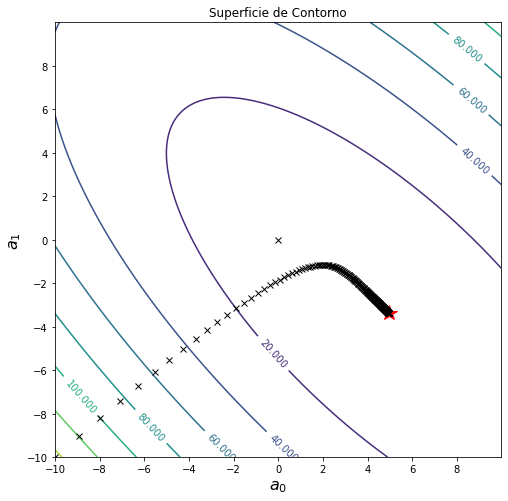

In [166]:
# Plotando a superfície de contorno dos PESOS vs ERRO

fig = plt.figure(figsize=(8, 8))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=16)
plt.ylabel('$a_1$', fontsize=16)
plt.title('Superficie de Contorno')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=16)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-10, 10, step=2.0))
plt.yticks(np.arange(-10, 10, step=2.0))
plt.show()

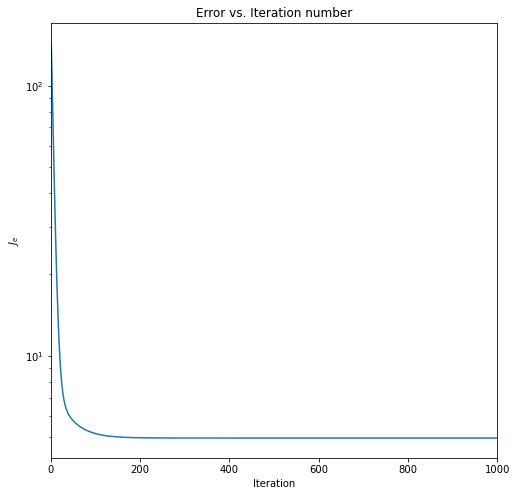

In [167]:
# Plotando o GRÁFICO do ERRO vs NÚMERO DE ITERAÇÕES:
fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(0, iteration), jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()